In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/mid_345_1111.jpg
/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/hard_32_1111.jpg
/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/mid_233_1111.jpg
/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/mid_200_1111.jpg
/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/mid_161_0110.jpg
/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/hard_47_1100.jpg
/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/easy_235_1111.jpg
/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/mid_277_1100.jpg
/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/hard_199_0011.jpg
/kaggle/input/real-and-fake-face-detection/real_and_fake_face/training_fake/easy_231_1011.jpg
/kaggle/input/real-and-fake-face-detection/real_and_fake_face/train

In [12]:
real = "../input/real-and-fake-face-detection/real_and_fake_face/training_real/"
fake = "../input/real-and-fake-face-detection/real_and_fake_face/training_fake/"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

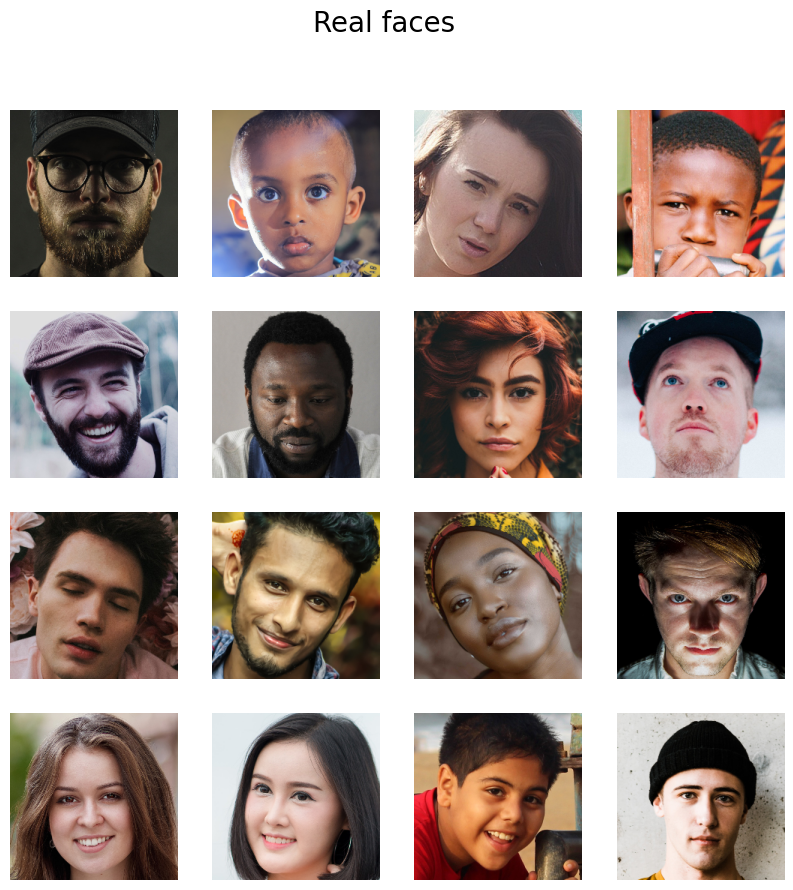

In [13]:
fig = plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(real + real_path[i]), cmap='gray')
    plt.suptitle("Real faces",fontsize=20)
    plt.axis('off')

plt.show()

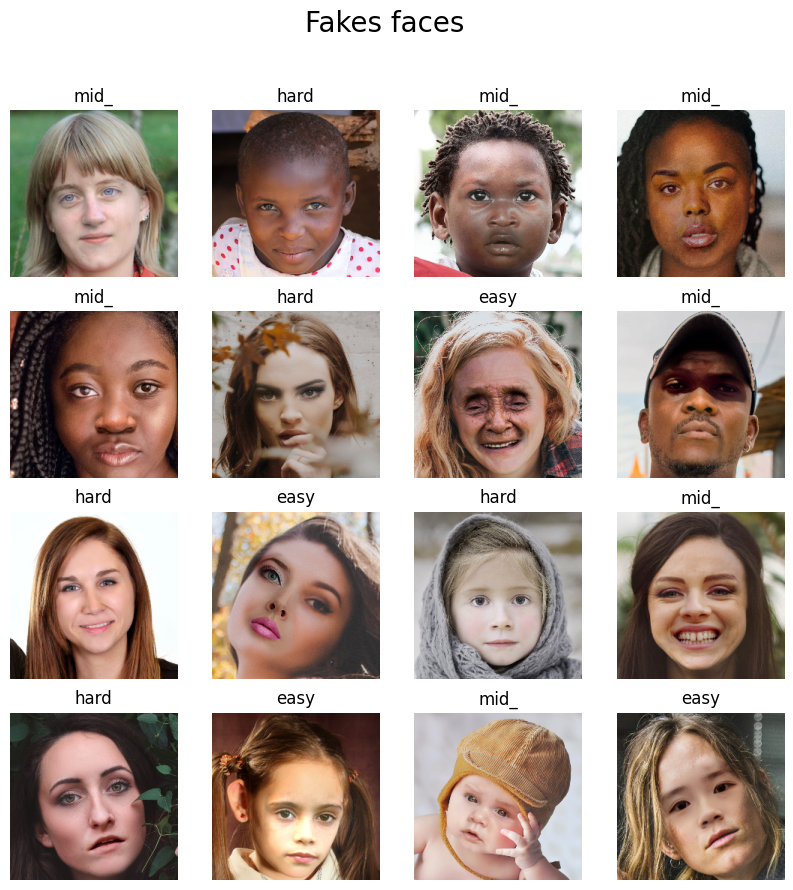

In [14]:
fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(fake + fake_path[i]), cmap='gray')
    plt.suptitle("Fakes faces",fontsize=20)
    plt.title(fake_path[i][:4])
    plt.axis('off')

plt.show()

In [15]:
dataset_path = "/kaggle/input/real-and-fake-face-detection/real_and_fake_face"

In [16]:
real_dir = '../input/real-and-fake-face-detection/real_and_fake_face/training_real/'  # Update this with the correct path
fake_dir = '../input/real-and-fake-face-detection/real_and_fake_face/training_fake/'  # Update this with the correct path

# Image size to resize (128x128 pixels in this case)
IMG_SIZE = 128

# Function to load images from a folder, resize, and label them
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Read image
        if img is not None:
            # Resize image to the specified size (128x128)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label)  # Label: 0 for real, 1 for fake
    return np.array(images), np.array(labels)

# Load real and fake images
real_images, real_labels = load_images_from_folder(real_dir, label=0)  # Label 0 for real faces
fake_images, fake_labels = load_images_from_folder(fake_dir, label=1)  # Label 1 for fake faces

# Combine real and fake images and their labels
X = np.concatenate((real_images, fake_images), axis=0)  # Combine images
y = np.concatenate((real_labels, fake_labels), axis=0)  # Combine labels

# Shuffle the dataset
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

# Normalize pixel values to [0, 1]
X = X / 255.0

print(f"Total images loaded: {len(X)}")
print(f"Shape of images: {X.shape}")  # Should be (num_samples, 128, 128, 3)
print(f"Shape of labels: {y.shape}")  # Should be (num_samples,)

Total images loaded: 2041
Shape of images: (2041, 128, 128, 3)
Shape of labels: (2041,)


In [17]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Flatten the images (required for Random Forest)
# Random Forest requires 2D feature vectors, so we flatten the images into a 1D array per image
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten training images
X_test_flat = X_test.reshape(X_test.shape[0], -1)     # Flatten test images

# Step 3: Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_flat, y_train)

# Step 4: Make predictions on the test data
y_pred = rf_model.predict(X_test_flat)

# Step 5: Evaluate the model
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Model Performance:
Accuracy: 0.5970636215334421
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.71      0.66       334
           1       0.57      0.47      0.51       279

    accuracy                           0.60       613
   macro avg       0.59      0.59      0.58       613
weighted avg       0.59      0.60      0.59       613

Confusion Matrix:
 [[236  98]
 [149 130]]
